In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = None

df = pd.read_csv('data/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# Handling missing values
for i in df.columns:
    if df[i].isna().sum() != 0:
        print('null values in', i, 'column :', df[i].isna().sum() ) 

null values in children column : 4
null values in country column : 488
null values in agent column : 16340
null values in company column : 112593


In [4]:
# Run len(df.index): we can see that our dataset contains 119390 rows
# Most rows in company columns are missing -> we will drop the whole column
df = df.drop(columns = 'company')

# We can drop 4 rows containing null values from chidren column
# It will not affect our result too much 
df = df.dropna(subset = ['children'])

# For country we will fill missing values with the mode frequent value.
df['country'].fillna(df['country'].mode()[0], inplace = True)

# Lastly, for agent column will will fill 9 for every null values. 
# This will represent agent ID 
df['agent'].fillna(0, inplace = True)

In [5]:
# Replace TA/TO with Undefined in distribution_channel column
df['distribution_channel'].replace("TA/TO", "Undefined", inplace = True)

# Replace Undefined, BB, FB, HB, SC to its meaning. 
df['meal'].replace(['Undefined', 'BB', 'FB', 'HB', 'SC'], 
                   [ 'No Meal', 'Breakfast', 'Full Board', 'Hald Board', 'No Meal'],
                   inplace = True)
# inplace = true -> directly modify the dataframe.
# inplace = false -> Creating a new df (default)

In [6]:
# Turn column into int data type
df['children'].astype(int)
df['agent'].astype(int)

# Turn column into datetime data type
pd.to_datetime(df['reservation_status_date'])

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119386, dtype: datetime64[ns]

In [7]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)

32020


In [8]:
# Create total night column
df['total_night'] = df['stays_in_weekend_nights'] + df['stays_in_weekend_nights']

# Convert month name to number then create new arrival date column by combining year month date
df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'] , format='%B').dt.month
df['arrival_date'] = pd.to_datetime(dict(year=df.arrival_date_year, month=df.arrival_date_month, day=df.arrival_date_day_of_month))

In [9]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                         int32
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [10]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_night',
       'arrival_date'],
      dtype='object')

In [11]:
columns_to_drop = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
                   'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status', 'reservation_status_date',
                   'arrival_date', 'stays_in_weekend_nights', 'stays_in_week_nights', 'booking_changes', 'deposit_type','adr',
                   'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number']
#drop
df.drop(columns = columns_to_drop, inplace = True)

In [12]:
df.describe()

,is_canceled,lead_time,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_night
count,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.00000,87366.000000,87366.000000,87366.000000,87366.000000
mean,0.274935,79.915207,1.875936,0.138681,0.010828,0.039088,0.030424,0.184053,81.01464,0.749823,0.084255,0.698613,2.010920
std,0.446484,86.056865,0.626475,0.455942,0.113616,0.193806,0.369208,1.732188,109.94285,10.017441,0.281577,0.831952,2.063962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,125.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.00000,0.000000,0.000000,1.000000,4.000000
max,1.000000,737.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,535.00000,391.000000,8.000000,5.000000,38.000000


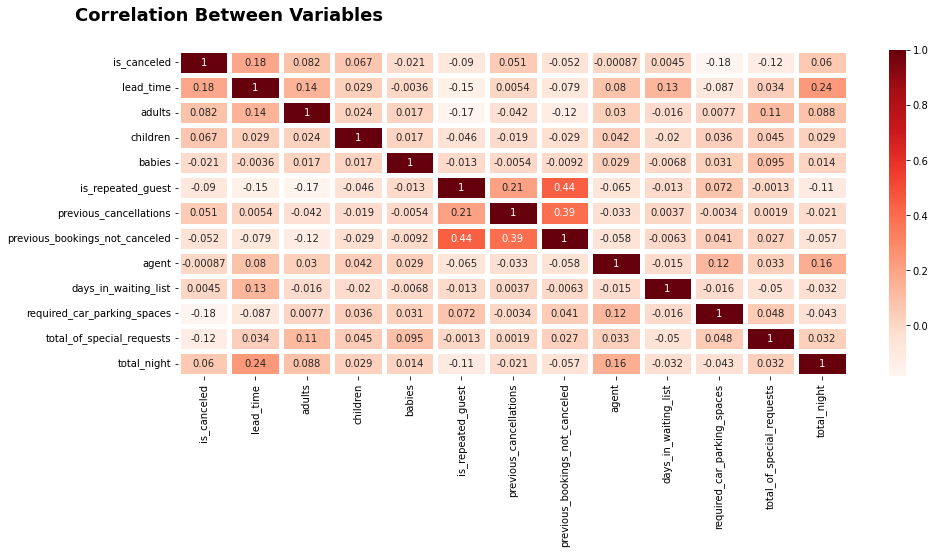

In [13]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=5)
plt.suptitle('Correlation Between Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha = 'left', fontsize='18', 
             fontfamily='sans-serif', color= 'black')
plt.show()